## GRAPPA g factor map 
###### Author: Zimu Huo
###### Date: 06.2022


This has the same sampling scheme as SENSE, so it is a more generalised version. Thus, the slice data and reference data are separated. 

-------------------------------------------------------------------------
References
    
    [1] 
    Author: Mark A. Griswold et al. 
    Title: General Formulation for Quantitative G-factorCalculation in GRAPPA Reconstructions
    Link: https://onlinelibrary.wiley.com/doi/epdf/10.1002/mrm.22066
    

In [8]:
import sys
sys.path.insert(1, '../')
import numpy as np
import matplotlib.pyplot as plt
from util.coil import *
import util.mask as undersample
from util.fft import *
import util.simulator as simulate
import util.phantom as phantom
from util.gfactor import *
from tqdm.notebook import tqdm
from util.zpad import *
from scipy import io
from util.twix import * 

In [9]:
indSlice = np.asarray([2], dtype = int)
numSlice = len(indSlice)
file_sms = "../lib/meas_MID00134_FID55501_catesain_4slices.dat"
file = readtwix(file_sms)
data = file[0]['readouts'][...,1]
rawImage = ifft2c(data)
ny, nx, numCoil= rawImage.shape

Software version: VD/VE (!?)

Scan  0
100 % parsed in 0 s. Estimated 0 s remaining.
WARNING more than one slice. Taking first one..
Scan  1
100 % parsed in 1 s. Estimated 0 s remaining.
----------------------------------------------------------------------------------------------------
reading raw data, calculating trajectories and sampling raster 


  0%|          | 0/1063 [00:00<?, ?it/s]

----------------------------------------------------------------------------------------------------
file parsed
----------------------------------------------------------------------------------------------------
loading and preprocessing the data..
----------------------------------------------------------------------------------------------------
dynamically combining data according to dtype, sli, par, rep..


  0%|          | 0/4 [00:00<?, ?it/s]

----------------------------------------------------------------------------------------------------
finished, the output is stored in a list format and each element of the list is a dictionary.
To access the data, use file[idx]["readout"] or file[idx]["flags"]
                                                                                                    
idx  file type
0   DATA


In [5]:
rawData = fft2c(rawImage)

In [6]:
recon = gfactor_grappa(rawData, ny, nx, 8)

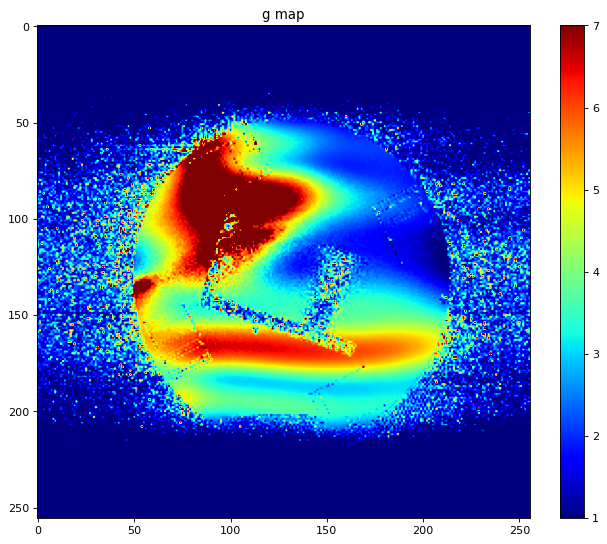

In [7]:
plt.figure(figsize=(12, 8), dpi=80)
tf = plt.imshow(np.abs(recon),cmap='jet')
plt.title("g map")
plt.colorbar(tf, fraction=0.046, pad=0.04)
plt.clim(1, 7)
plt.show()